In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
data = pd.read_csv('Samples.txt',sep='\t')

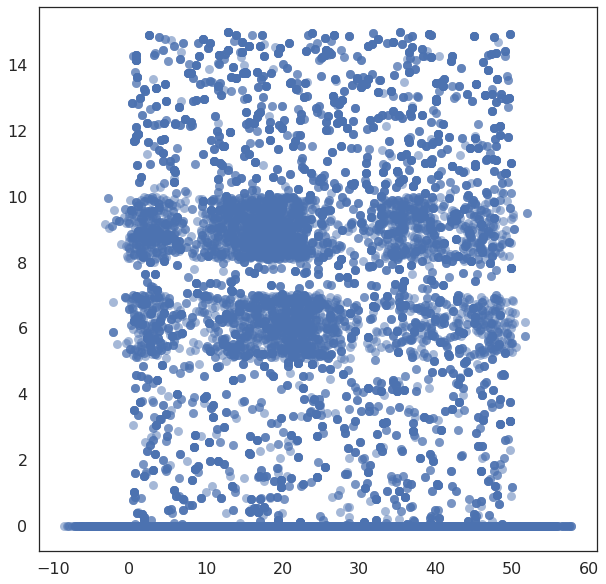

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(data.X, data.A, color='b', **plot_kwds)
Data_set = np.vstack([data.X,data.A]).T

In [4]:
Data_set.shape

(33000, 2)

In [5]:
import hdbscan

In [ ]:
hdbscan.HDBSCAN?


In [9]:
clusterer = hdbscan.HDBSCAN(algorithm='boruvka_kdtree',min_cluster_size=3, gen_min_span_tree=False)
clusterer.fit(Data_set)

HDBSCAN(algorithm='boruvka_kdtree', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=3, min_samples=None, p=None,
    prediction_data=False)

In [10]:
plt.figure(figsize=(25,20))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)


AttributeError: No minimum spanning tree was generated.This may be due to optimized algorithm variations that skip explicit generation of the spanning tree.

<Figure size 1800x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [ ]:
#plt.figure(figsize=(15,10))
clusterer.condensed_tree_.plot()

In [ ]:
plt.figure(figsize=(15,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
plt.figure(figsize=(15,10))
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(data.X, data.A, c=cluster_colors, **plot_kwds)

